In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import cv2
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
import os

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

In [3]:
print('X training shape: ', X_train.shape)
print('Y training shape: ', y_train.shape)
print('X testing shape: ', X_test.shape)
print('Y testing shape: ', y_test.shape)

X training shape:  (60000, 28, 28)
Y training shape:  (60000,)
X testing shape:  (10000, 28, 28)
Y testing shape:  (10000,)


In [4]:
#Noramlize the image pixels
X_train = X_train.astype("float32")/255
X_test =X_test.astype("float32")/255


In [5]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [6]:
#Expanding dimension with 1 at the end to create similar channel to image input
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, - 1)

#X_test = np.expand_dims(X_test, 0) adds 1 in the beigning 


In [7]:
print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)

X train shape: (60000, 28, 28, 1)
X test shape: (10000, 28, 28, 1)


In [8]:
#One Hot encoding 
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [16]:
model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Conv2D(64,(3,3), padding='same', input_shape=(28,28,1), activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Conv2D(32,(3,3), padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Conv2D(20,(3,3), padding='same',activation='relu'))
model1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Dropout(0.3))

model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(62,activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

In [18]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
r = model1.fit(X_train,y_train,epochs = 10,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/10


423/469 [==========================>...] - ETA: 21s - loss: 0.8775 - accuracy: 0.6719

KeyboardInterrupt: 

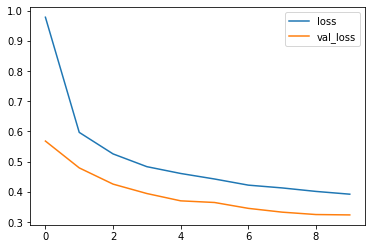

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

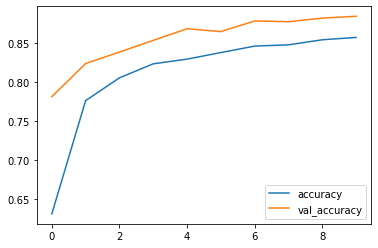

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()